In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_types = {"mapped_veh_id": np.int32,
            #"RS_E_OilPress_PC1": np.int32,
            #"RS_E_OilPress_PC2": np.int32,
            #"RS_E_RPM_PC1": np.int32,
            #"RS_E_RPM_PC2": np.int32,
            #"RS_E_InAirTemp_PC1": np.int32,
            #"RS_E_InAirTemp_PC2": np.int32,
            #"RS_E_WatTemp_PC1": np.int32,
            #"RS_E_WatTemp_PC2": np.int32,
            #"RS_T_OilTemp_PC1": np.int32,
            #"RS_T_OilTemp_PC2": np.int32
            }
data = pd.read_csv("../data/ar41_for_ulb.csv", delimiter=";", index_col=0, dtype=col_types)


In [3]:
data[:10]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
0,181,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0
1,143,2023-08-01 06:36:29,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0
2,183,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0
3,177,2023-08-01 13:53:38,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0
4,143,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0
5,121,2023-08-24 07:06:16,50.404240,4.438329,40.0,41.0,220.0,210.0,798.0,804.0,87.0,87.0,85.0,84.0
6,136,2023-08-24 07:20:23,51.180442,4.826991,38.0,34.0,213.0,282.0,830.0,857.0,82.0,82.0,81.0,83.0
7,172,2023-08-24 07:34:24,51.066767,5.229784,43.0,39.0,175.0,265.0,802.0,898.0,85.0,82.0,88.0,88.0
8,181,2023-08-24 07:34:37,51.215678,5.425092,48.0,41.0,420.0,348.0,1497.0,1498.0,84.0,87.0,82.0,89.0
9,180,2023-08-01 00:49:41,51.015549,3.774712,27.0,22.0,317.0,320.0,801.0,802.0,72.0,70.0,62.0,62.0


In [4]:
data.shape

(17679273, 14)

In [63]:
summary = data.describe()
summary

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
count,1.767927e+07,1.767927e+07,1.767927e+07,1.767927e+07,1.766655e+07,1.767927e+07,1.766655e+07,1.767927e+07,1.766655e+07,1.767927e+07,1.766655e+07,1.767927e+07,1.766655e+07
mean,1.508423e+02,5.087641e+01,4.228568e+00,3.202422e+01,3.233414e+01,2.636115e+02,2.706874e+02,9.122489e+02,9.079636e+02,7.693166e+01,7.614234e+01,7.654693e+01,7.616182e+01
std,2.694316e+01,3.133396e-01,5.981553e-01,3.280040e+02,3.479992e+02,1.152382e+02,1.161168e+02,3.833051e+02,3.884709e+02,1.365462e+01,1.452870e+01,1.450369e+01,1.535040e+01
min,1.020000e+02,4.829568e+01,1.750491e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,-1.700000e+01,-1.280000e+02,0.000000e+00
25%,1.280000e+02,5.077065e+01,3.715411e+00,2.200000e+01,2.200000e+01,2.030000e+02,2.100000e+02,7.970000e+02,7.970000e+02,7.700000e+01,7.600000e+01,7.400000e+01,7.400000e+01
50%,1.510000e+02,5.100253e+01,3.873272e+00,3.200000e+01,3.300000e+01,2.380000e+02,2.480000e+02,8.010000e+02,8.010000e+02,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01
75%,1.740000e+02,5.108688e+01,4.535240e+00,4.000000e+01,3.900000e+01,3.200000e+02,3.310000e+02,8.120000e+02,8.110000e+02,8.400000e+01,8.400000e+01,8.500000e+01,8.500000e+01
max,1.970000e+02,5.285706e+01,8.045492e+00,6.553500e+04,6.553500e+04,6.900000e+02,6.900000e+02,2.309000e+03,9.732000e+03,1.090000e+02,1.190000e+02,1.270000e+02,1.170000e+02


In [9]:
data.duplicated(subset=("timestamps_UTC", "lat", "lon"), keep='first').sum()

0

### Save sorted dataset

In [4]:
data = data.sort_values(by=["mapped_veh_id", "timestamps_UTC"])
data.to_csv("../data/sorted_full_data.csv", sep=";", index=False)

In [7]:
data

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
5493376,102,2023-01-23 07:25:08,51.017864,3.769079,17.0,18.0,210.0,210.0,858.0,839.0,78.0,80.0,71.0,79.0
8969009,102,2023-01-23 07:25:16,51.017875,3.769046,17.0,20.0,200.0,200.0,801.0,804.0,79.0,80.0,76.0,79.0
13873566,102,2023-01-23 07:25:37,51.017208,3.770179,19.0,20.0,193.0,207.0,803.0,808.0,80.0,81.0,79.0,81.0
14994675,102,2023-01-23 07:25:41,51.016916,3.771036,19.0,20.0,196.0,203.0,801.0,803.0,80.0,81.0,79.0,81.0
11935795,102,2023-01-23 07:26:10,51.016503,3.772182,19.0,21.0,200.0,203.0,795.0,807.0,80.0,82.0,79.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820536,197,2023-09-13 17:33:03,50.402693,4.450111,37.0,40.0,220.0,258.0,803.0,803.0,81.0,79.0,77.0,81.0
17128255,197,2023-09-13 17:33:58,50.401657,4.452693,37.0,38.0,224.0,307.0,843.0,941.0,80.0,78.0,77.0,80.0
15456252,197,2023-09-13 17:34:03,50.401830,4.452217,37.0,38.0,224.0,307.0,841.0,932.0,80.0,78.0,77.0,80.0
7666957,197,2023-09-13 17:34:58,50.401057,4.455388,36.0,38.0,207.0,244.0,800.0,803.0,81.0,80.0,77.0,82.0


### Vehicules

In [13]:
vehicules = data["mapped_veh_id"].unique()
vehicules

array([181, 143, 183, 177, 121, 136, 172, 180, 151, 128, 182, 194, 134,
       140, 161, 142, 166, 176, 178, 145, 125, 152, 154, 109, 146, 170,
       106, 188, 157, 103, 171, 138, 137, 112, 179, 190, 122, 102, 141,
       189, 173, 116, 114, 159, 153, 149, 111, 150, 184, 126, 135, 192,
       160, 175, 119, 164, 186, 174, 187, 167, 108, 133, 168, 110, 191,
       124, 130, 185, 105, 120, 158, 197, 162, 115, 104, 139, 131, 169,
       155, 165, 147, 156, 196, 117, 113, 144, 129, 107, 123, 163, 127,
       148])

In [7]:
len(vehicules)

92

<Axes: ylabel='mapped_veh_id'>

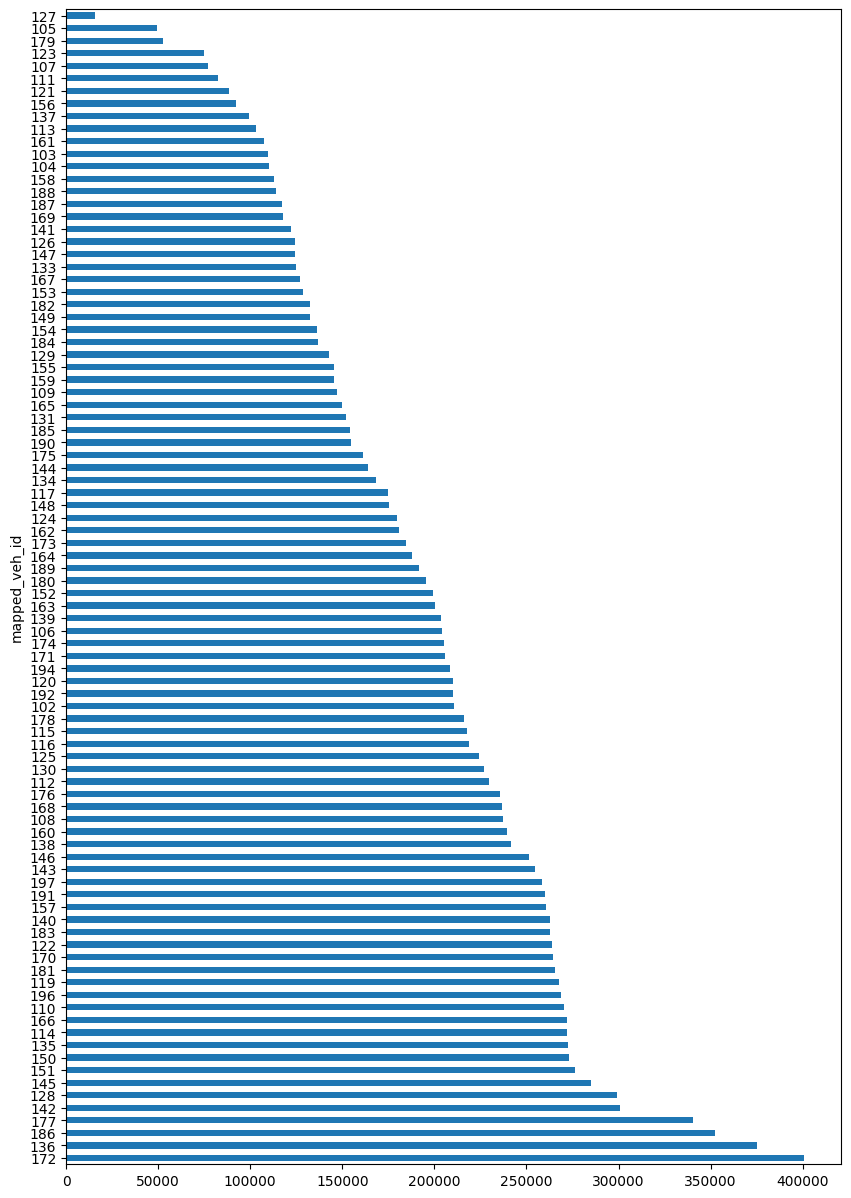

In [30]:
plt.figure(figsize=(10, 15))
data['mapped_veh_id'].value_counts().plot(kind='barh')

In [8]:
timeseries = data[data['mapped_veh_id'] == 120].sort_values(by="timestamps_UTC")
timeseries["timestamps_UTC"] = pd.to_datetime(timeseries["timestamps_UTC"])
timeseries = timeseries.set_index("timestamps_UTC")
timeseries

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
timestamps_UTC,,,,,,,,,,,,,
2023-01-20 13:20:29,120,50.400896,4.458035,53.0,53.0,0.0,3.0,0.0,0.0,68.0,68.0,66.0,63.0
2023-01-20 13:20:32,120,50.400640,4.459011,53.0,53.0,0.0,3.0,0.0,0.0,68.0,68.0,66.0,63.0
2023-01-20 13:21:30,120,50.400897,4.458008,53.0,53.0,0.0,3.0,0.0,0.0,68.0,68.0,65.0,63.0
2023-01-20 13:21:33,120,50.400664,4.458962,53.0,53.0,0.0,3.0,0.0,0.0,68.0,68.0,65.0,65.0
2023-01-20 13:22:30,120,50.400885,4.457992,54.0,53.0,0.0,3.0,0.0,0.0,68.0,67.0,66.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:49:12,120,50.144785,4.500422,37.0,32.0,200.0,241.0,801.0,801.0,78.0,78.0,77.0,76.0
2023-09-13 21:49:15,120,50.145210,4.500260,37.0,32.0,200.0,238.0,805.0,798.0,78.0,78.0,77.0,76.0
2023-09-13 21:50:15,120,50.145207,4.500265,37.0,31.0,196.0,238.0,798.0,798.0,78.0,79.0,79.0,75.0


In [38]:
timeseries.index.max() - timeseries.index.min()

Timedelta('236 days 08:31:47')

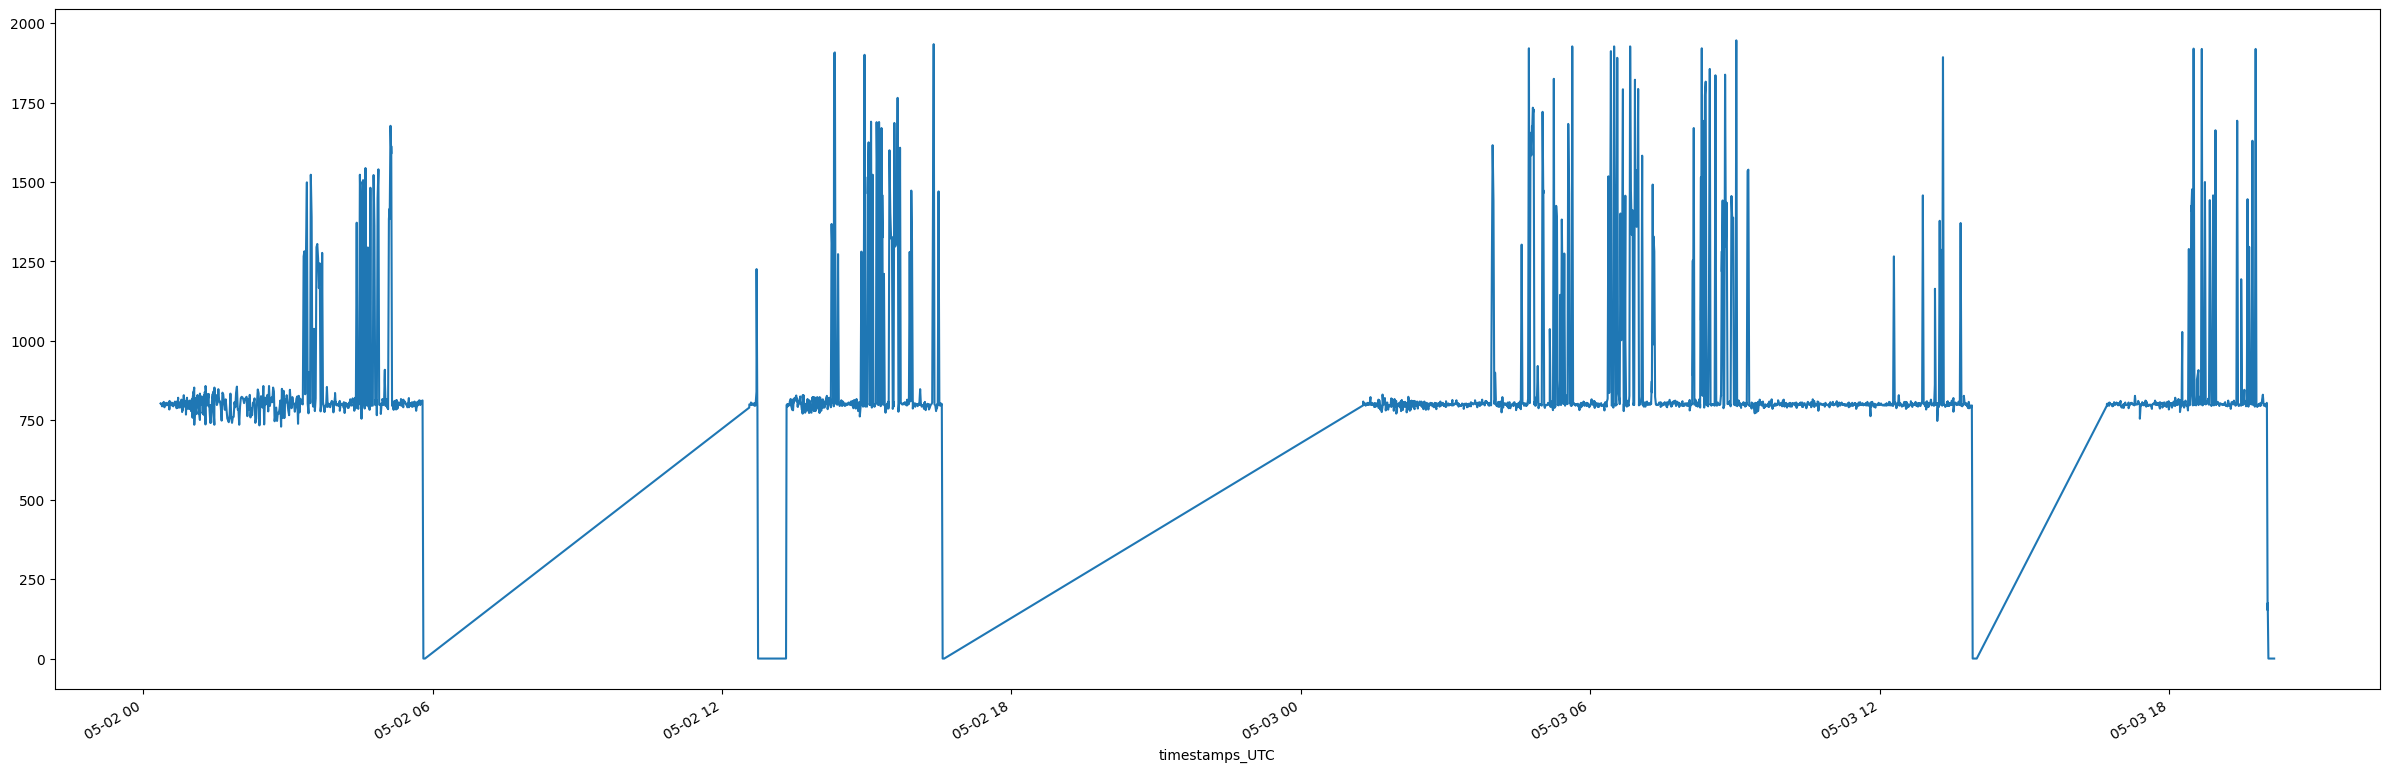

<Axes: xlabel='timestamps_UTC'>

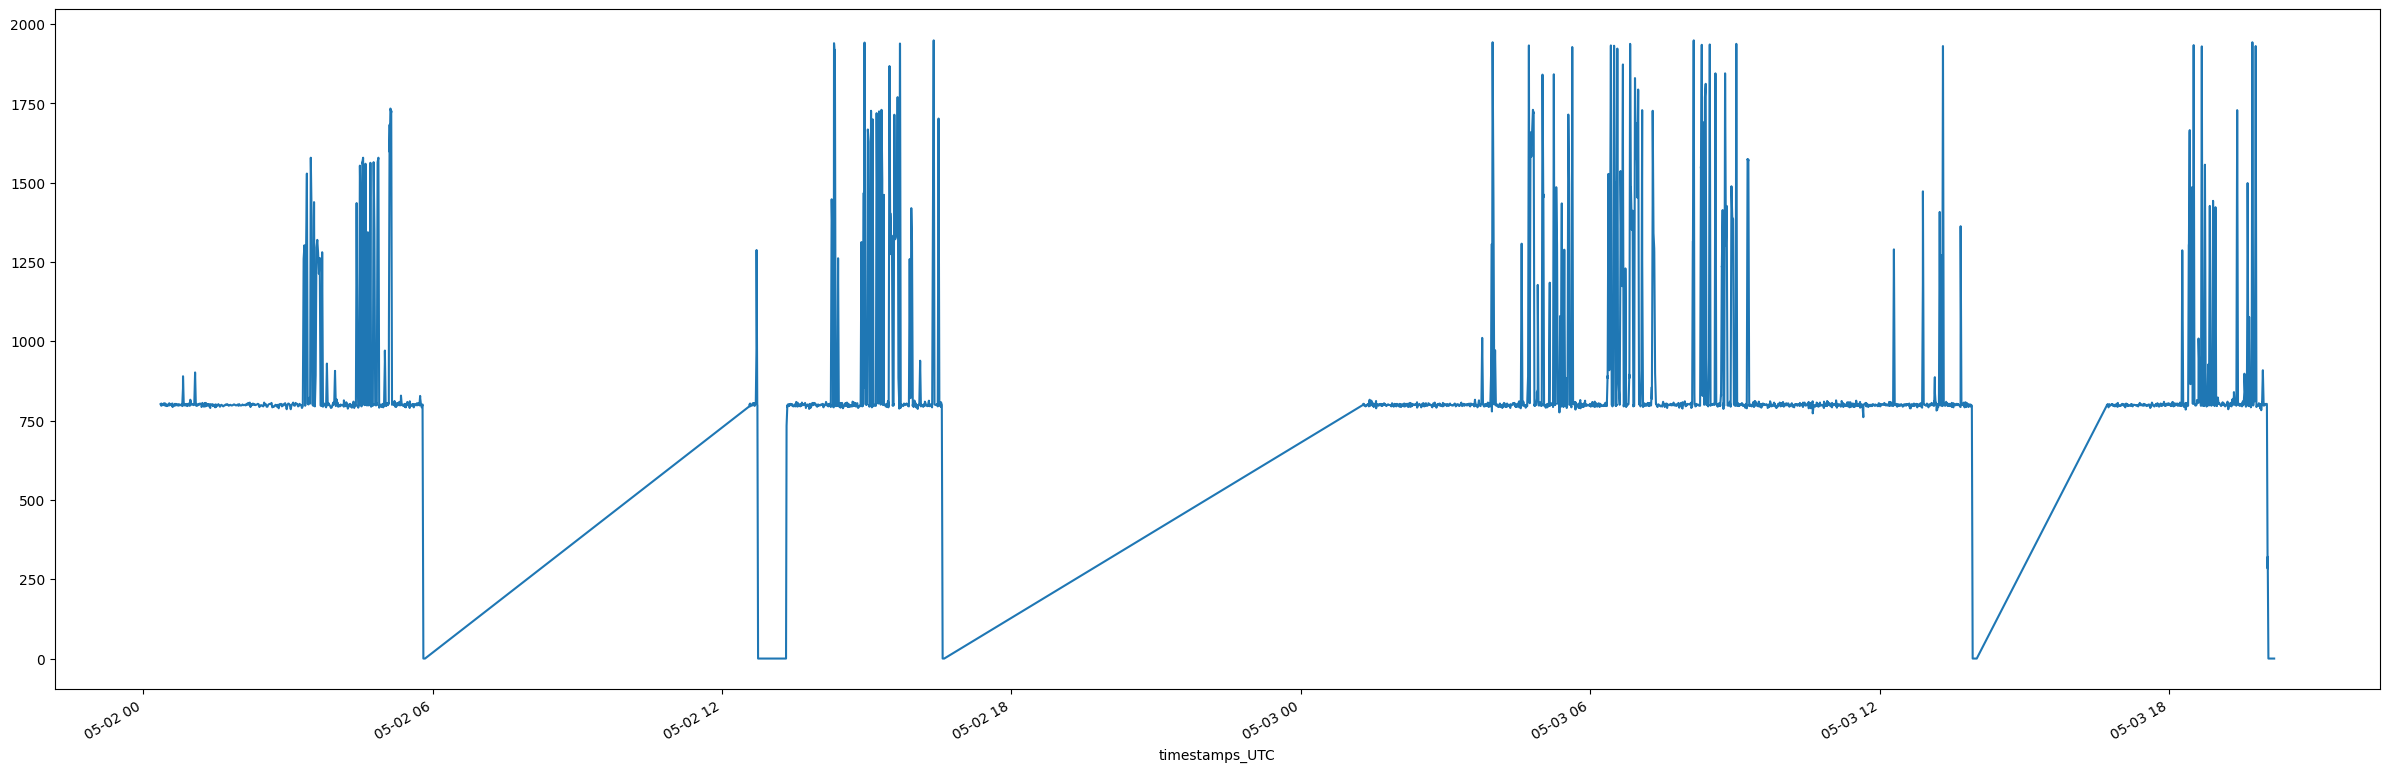

In [5]:
timeseries["2023-05-02":"2023-05-3"]["RS_E_RPM_PC1"].plot(figsize=(30,10))
timeseries["2023-05-02":"2023-05-3"]["RS_E_RPM_PC2"].plot(figsize=(30,10))

<Axes: xlabel='timestamps_UTC'>

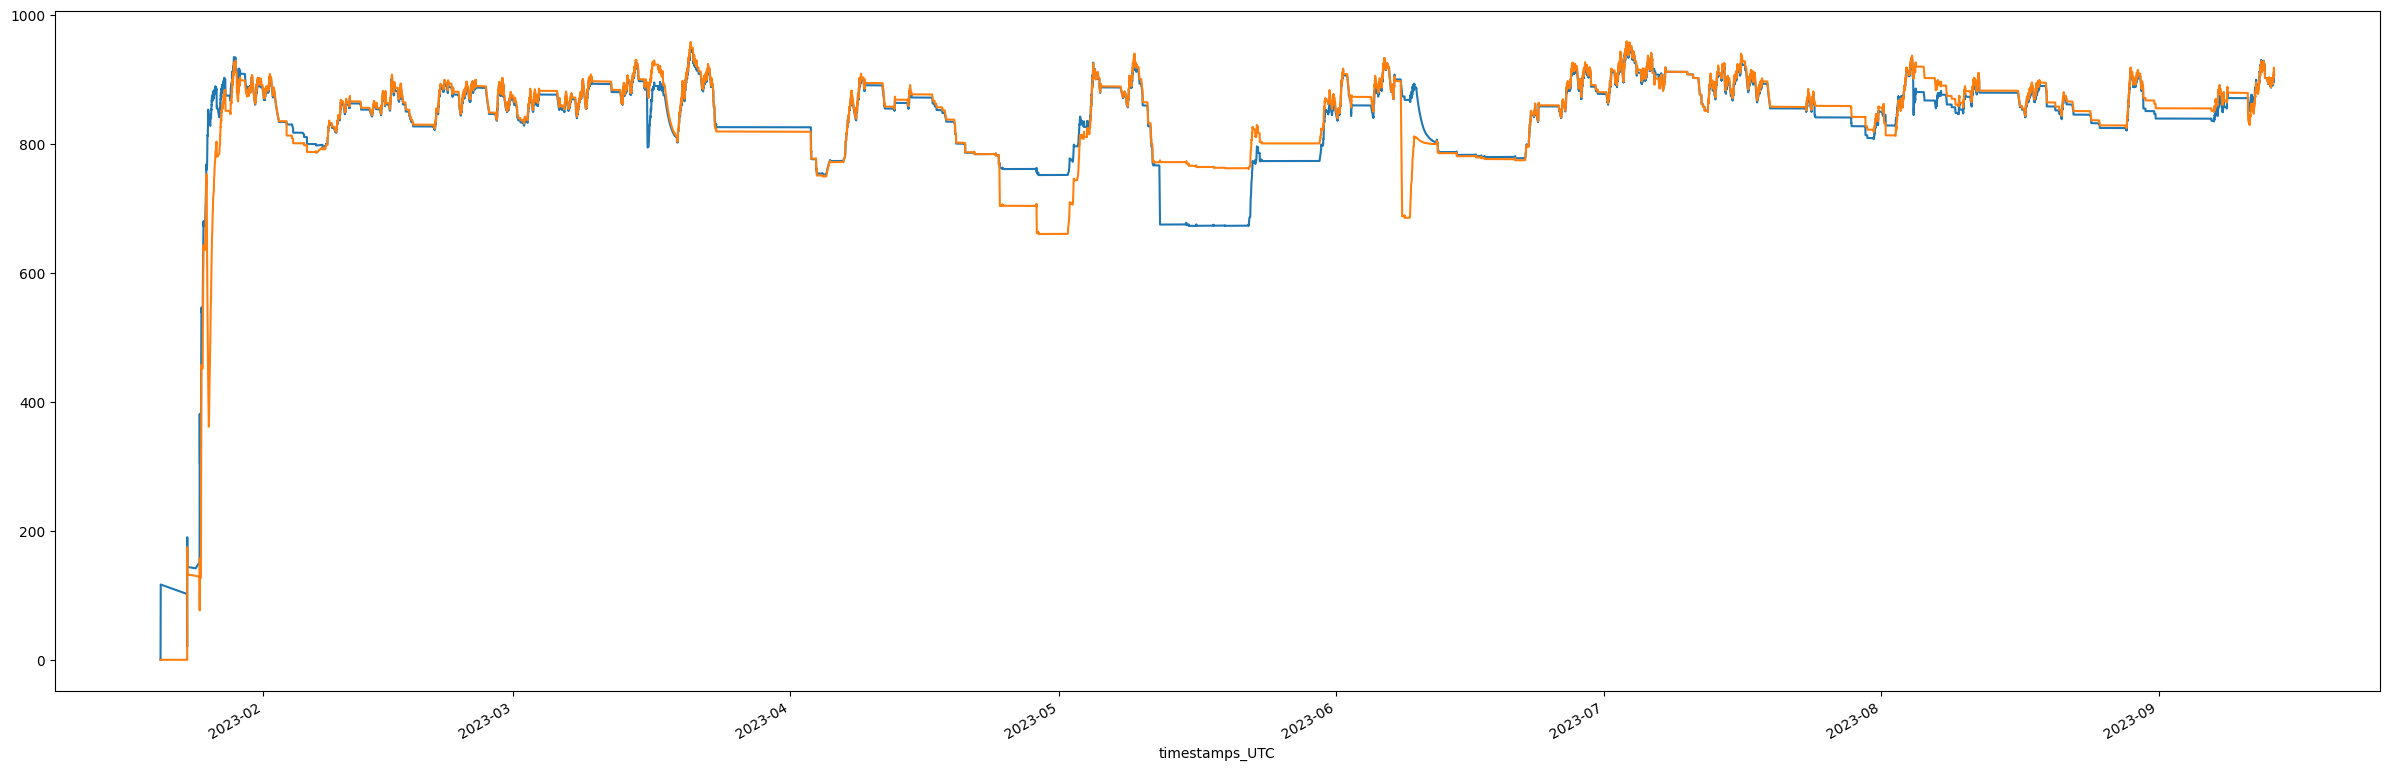

In [48]:
timeseries['RS_E_RPM_PC1'].ewm(span = 3600).mean().plot(figsize=(30,10))
timeseries['RS_E_RPM_PC2'].ewm(span = 3600).mean().plot(figsize=(30,10))


In [22]:
timeseries = data[data['mapped_veh_id'] == 127].sort_values(by="timestamps_UTC")
timeseries["timestamps_UTC"] = pd.to_datetime(timeseries["timestamps_UTC"])
timeseries = timeseries.set_index("timestamps_UTC")

In [28]:
timeseries[2000:2500]

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
timestamps_UTC,,,,,,,,,,,,,
2023-04-21 12:38:53,127,50.467803,4.841108,30.0,27.0,269.0,327.0,796.0,799.0,78.0,71.0,76.0,68.0
2023-04-21 12:39:52,127,50.467814,4.841109,30.0,27.0,269.0,320.0,798.0,796.0,78.0,72.0,74.0,68.0
2023-04-21 12:40:56,127,50.467794,4.841087,30.0,27.0,265.0,324.0,815.0,806.0,78.0,72.0,74.0,68.0
2023-04-21 12:41:56,127,50.467807,4.841102,30.0,27.0,272.0,317.0,782.0,799.0,78.0,72.0,74.0,68.0
2023-04-21 12:42:56,127,50.467828,4.841088,30.0,27.0,265.0,320.0,799.0,805.0,78.0,73.0,76.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26 12:03:06,127,51.016505,3.772746,21.0,23.0,0.0,0.0,0.0,0.0,45.0,48.0,35.0,38.0
2023-04-26 12:04:07,127,51.016501,3.772733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,37.0
2023-04-26 12:05:07,127,51.016524,3.772730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,36.0


### Latitude and longitude

Entries with wrong latitude or longitude

> Belgium spans 2 degrees in latitude, from 51 degrees 30 minutes N at Meerle (northernmost point) to 49 degrees 30 minutes N at Torgny (southernmost point). In longitude, it spans less than 4 degrees, from 2 degrees 33 minutes E to 6 degrees 24 minutes E.

https://www.belgium.be/en/about_belgium/country/geography

In [21]:
data[(data["lon"] == 0) | (data["lat"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2


In [23]:
data[(data["lat"] > 52) | (data["lat"] < 49)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
2929855,194.0,2023-05-09 03:34:41,52.857059,4.485541,18.0,30.0,224.0,255.0,801.0,793.0,75.0,73.0,66.0,67.0
8953244,194.0,2023-01-25 06:22:40,48.295677,5.484127,31.0,38.0,175.0,203.0,0.0,804.0,83.0,87.0,82.0,87.0


In [18]:
data[(data["lon"] > 6.5) | (data["lon"] < 2)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
3213259,194.0,2023-06-16 13:21:36,50.397906,0.206793,40.0,41.0,200.0,217.0,800.0,803.0,83.0,87.0,78.0,85.0
4484586,194.0,2023-06-16 13:19:06,50.330024,0.175049,40.0,41.0,200.0,220.0,800.0,803.0,83.0,87.0,75.0,84.0
8972089,194.0,2023-01-27 05:01:42,50.008925,8.045492,17.0,26.0,207.0,231.0,0.0,795.0,78.0,80.0,73.0,76.0
12241898,194.0,2023-06-16 13:11:00,50.573667,1.954037,42.0,42.0,203.0,224.0,800.0,801.0,81.0,86.0,77.0,84.0
13246459,194.0,2023-06-16 13:20:07,50.358537,0.190611,40.0,40.0,200.0,217.0,794.0,800.0,83.0,88.0,78.0,85.0
14485639,194.0,2023-03-24 21:53:09,49.729545,6.572482,17.5,39.0,163.5,322.0,1094.5,1246.5,83.0,85.0,82.5,86.5
17612420,194.0,2023-06-16 13:12:00,50.589381,1.960787,42.0,42.0,200.0,217.0,799.0,801.0,81.0,86.0,77.0,84.0


In [37]:
data[(data["mapped_veh_id"] == 194) & (data["timestamps_UTC"] >= "2023-06-16 13:15") & (data["timestamps_UTC"] < "2023-06-16 13:30")].sort_values("timestamps_UTC")

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
1566686,194.0,2023-06-16 13:15:12,51.015765,3.773721,41.0,40.0,203.0,220.0,797.0,792.0,82.0,87.0,77.0,84.0
8121641,194.0,2023-06-16 13:16:12,51.015756,3.773742,41.0,41.0,203.0,220.0,800.0,803.0,82.0,87.0,79.0,85.0
11510578,194.0,2023-06-16 13:17:15,51.015762,3.773737,41.0,41.0,203.0,217.0,800.0,803.0,82.0,87.0,76.0,84.0
3957175,194.0,2023-06-16 13:18:15,51.015760,3.773722,41.0,41.0,203.0,217.0,796.0,802.0,83.0,87.0,77.0,84.0
4484586,194.0,2023-06-16 13:19:06,50.330024,0.175049,40.0,41.0,200.0,220.0,800.0,803.0,83.0,87.0,75.0,84.0
16405041,194.0,2023-06-16 13:19:15,51.015756,3.773746,40.0,41.0,203.0,220.0,805.0,803.0,83.0,87.0,77.0,85.0
13246459,194.0,2023-06-16 13:20:07,50.358537,0.190611,40.0,40.0,200.0,217.0,794.0,800.0,83.0,88.0,78.0,85.0
9570509,194.0,2023-06-16 13:20:16,51.015741,3.773737,40.0,40.0,196.0,217.0,807.0,795.0,83.0,88.0,78.0,84.0
3948323,194.0,2023-06-16 13:21:16,51.015758,3.773741,40.0,40.0,200.0,341.0,1064.0,1402.0,83.0,87.0,77.0,85.0
3213259,194.0,2023-06-16 13:21:36,50.397906,0.206793,40.0,41.0,200.0,217.0,800.0,803.0,83.0,87.0,78.0,85.0


Number of different coordinates

In [46]:
unique_lat_lon = data[["lat", "lon"]].drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

# Unique coordinates:  17527056
# Duplicate coordinates 152217


In [48]:
unique_lat_lon = data[["lat", "lon"]].round(2).drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

# Unique coordinates:  1780
# Duplicate coordinates 17677493


In [51]:
unique_lat_lon = data[["timestamps_UTC", "lat", "lon"]].drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

# Unique coordinates:  17679273
# Duplicate coordinates 0


### Temperatures

#### Water

In [33]:
data[(data["RS_E_WatTemp_PC1"] == 0) |  (data["RS_E_WatTemp_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
64,194,2023-08-24 18:41:11,50.784013,3.619873,0.0,44.0,148.0,351.000000,829.5,1603.500000,0.0,89.0,81.500000,87.0
73,194,2023-08-24 20:34:22,51.035433,3.711526,0.0,41.0,0.0,210.000000,0.0,802.000000,0.0,84.0,75.000000,82.0
74,194,2023-08-24 20:47:53,51.035310,3.712176,0.0,38.0,0.0,213.333333,0.0,799.666667,0.0,83.0,73.666667,82.0
341,119,2023-08-01 07:29:27,51.015963,3.773588,0.0,37.0,0.0,0.000000,0.0,0.000000,0.0,80.0,83.000000,75.0
548,112,2023-08-24 15:11:04,51.015822,3.773962,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,60.000000,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678730,192,2023-05-19 19:29:25,50.851453,3.601575,45.0,0.0,172.0,0.000000,799.0,0.000000,78.0,0.0,77.000000,83.0
17678760,192,2023-05-20 03:23:45,51.014301,3.779180,11.0,27.0,434.0,6.000000,806.0,0.000000,38.0,0.0,39.000000,37.0
17678771,134,2023-05-19 14:45:09,50.937141,5.306424,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,47.000000,41.0
17679104,112,2023-05-07 08:56:40,51.015929,3.774806,0.0,29.0,0.0,34.000000,0.0,108.000000,0.0,77.0,71.000000,77.0


In [39]:
data[(data["RS_E_WatTemp_PC1"] < 0) |  (data["RS_E_WatTemp_PC2"] < 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
39101,164,2023-08-20 10:44:04,51.144044,5.216783,68.0,22.5,393.0,184.5,1947.0,974.0,86.0,-8.5,85.5,85.0
393715,128,2023-01-25 16:02:02,50.937013,5.307091,4.0,3.0,6.0,3.0,0.0,0.0,3.0,-1.0,1.0,0.0
394108,128,2023-01-24 07:49:30,50.937352,5.307102,2.0,2.0,624.0,3.0,801.0,0.0,22.0,-1.0,3.0,0.0
406236,128,2023-01-26 05:34:24,50.936982,5.307086,0.0,0.0,617.0,614.0,798.0,796.0,20.0,-4.0,4.0,0.0
694961,128,2023-01-25 15:52:01,50.937207,5.307729,3.0,2.0,6.0,3.0,0.0,0.0,3.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17383488,128,2023-01-26 05:32:34,50.936985,5.307080,0.0,1.0,626.0,3.0,801.0,0.0,16.0,-5.0,2.0,0.0
17390975,128,2023-01-25 15:53:01,50.937200,5.307730,3.0,2.0,6.0,3.0,0.0,0.0,3.0,-1.0,1.0,0.0
17396211,128,2023-01-25 15:58:03,50.935363,5.311259,4.0,3.0,6.0,3.0,0.0,0.0,3.0,-1.0,4.0,0.0
17397458,107,2023-01-29 22:37:48,50.094952,4.526641,8.0,13.0,355.0,3.0,795.0,0.0,67.0,-2.0,55.0,14.0


In [6]:
data[(data["RS_E_WatTemp_PC1"] > 100) | (data["RS_E_WatTemp_PC2"] > 100)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
6370081,110,2023-07-19 14:48:17,51.173191,3.586205,46.0,40.0,260.0,220.5,1429.5,1333.0,100.5,95.0,105.5,97.5
1321156,110,2023-07-19 14:48:20,51.173774,3.585330,46.0,40.0,269.0,248.0,1334.0,1358.0,101.0,96.0,107.0,98.0
13471796,110,2023-07-20 16:39:00,50.971018,3.791678,42.0,40.0,162.0,158.0,795.0,801.0,101.0,95.0,106.0,95.0
14187648,110,2023-07-20 16:39:05,50.971355,3.792061,42.0,40.0,162.0,158.0,795.0,800.0,101.0,95.0,106.0,95.0
4972136,110,2023-07-20 16:50:34,51.019970,3.764825,42.0,40.0,169.0,162.0,796.0,802.0,101.0,93.0,104.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16415465,192,2023-06-04 14:47:52,51.019478,3.765712,51.0,43.0,248.0,351.0,1699.0,1499.0,101.0,95.0,103.0,97.0
1595163,192,2023-06-04 16:48:39,51.020226,3.764327,50.0,40.0,155.0,189.0,818.0,821.0,101.0,95.0,102.0,96.0
4513033,192,2023-06-04 16:48:40,51.019972,3.764804,50.0,40.0,151.0,179.0,808.0,809.0,101.0,96.0,101.0,96.0
15818622,194,2023-05-20 13:47:44,51.154356,3.615408,43.0,48.0,220.0,227.0,1104.0,999.0,96.0,101.0,97.0,103.0


In [ ]:
data[(data["RS_E_WatTemp_PC1"] > 100) | (data["RS_E_WatTemp_PC2"] > 100)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
4833,128,2023-08-15 11:59:28,51.181219,5.061351,47.0,46.0,327.0,331.0,1888.0,1923.0,101.0,82.0,98.0,92.0
5010,128,2023-08-16 10:43:41,51.015487,5.348506,43.0,45.0,72.0,317.0,189.0,1916.0,103.0,80.0,101.0,89.0
20094,128,2023-08-10 13:40:11,51.051165,5.234771,47.0,41.0,317.0,334.0,1497.0,1496.0,102.0,80.0,103.0,91.0
20171,128,2023-08-10 13:55:00,51.008189,5.347875,80.0,41.0,10.0,310.0,0.0,1701.0,104.0,82.0,98.0,90.0
21815,128,2023-08-17 17:14:04,51.168618,5.165785,43.0,38.0,182.0,172.0,806.0,813.0,101.0,85.0,101.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675000,128,2023-05-19 14:30:57,51.050229,5.236675,46.0,41.0,269.0,320.0,1117.0,1378.0,101.0,82.0,103.0,95.0
17675007,128,2023-05-19 14:46:38,50.971999,5.345554,45.0,40.0,282.0,313.0,1393.0,1588.0,101.0,78.0,99.0,86.0
17675913,123,2023-05-13 12:12:08,50.990055,5.348790,45.0,50.0,175.0,162.0,799.0,807.0,87.0,105.0,89.0,105.0
17678880,134,2023-05-27 10:58:47,51.045415,5.248421,49.0,46.0,255.0,172.0,797.0,799.0,85.0,105.0,87.0,100.0


#### Air

In [41]:
data[(data["RS_E_InAirTemp_PC1"] == 0) |  (data["RS_E_InAirTemp_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
64,194,2023-08-24 18:41:11,50.784013,3.619873,0.0,44.0,148.0,351.000000,829.5,1603.500000,0.0,89.0,81.500000,87.0
73,194,2023-08-24 20:34:22,51.035433,3.711526,0.0,41.0,0.0,210.000000,0.0,802.000000,0.0,84.0,75.000000,82.0
74,194,2023-08-24 20:47:53,51.035310,3.712176,0.0,38.0,0.0,213.333333,0.0,799.666667,0.0,83.0,73.666667,82.0
341,119,2023-08-01 07:29:27,51.015963,3.773588,0.0,37.0,0.0,0.000000,0.0,0.000000,0.0,80.0,83.000000,75.0
548,112,2023-08-24 15:11:04,51.015822,3.773962,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,60.000000,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678673,103,2023-05-19 15:48:20,50.401155,4.456027,22.0,0.0,79.0,0.000000,0.0,0.000000,63.0,0.0,57.000000,56.0
17678727,192,2023-05-19 18:52:22,51.035634,3.710656,34.0,0.0,175.0,0.000000,803.0,0.000000,78.0,0.0,75.000000,79.0
17678730,192,2023-05-19 19:29:25,50.851453,3.601575,45.0,0.0,172.0,0.000000,799.0,0.000000,78.0,0.0,77.000000,83.0
17678771,134,2023-05-19 14:45:09,50.937141,5.306424,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,47.000000,41.0


In [45]:
data[(data["RS_E_InAirTemp_PC1"] > 65) |  (data["RS_E_InAirTemp_PC2"] > 65)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
769,150,2023-08-25 07:24:15,51.015536,3.775840,77.0,32.0,0.0,213.0,0.0,798.0,67.0,81.0,74.0,80.0
1011,150,2023-08-25 06:40:09,51.032688,3.738170,78.0,33.0,0.0,379.0,0.0,1662.0,73.0,83.0,81.0,84.0
1106,170,2023-08-02 06:40:54,51.040250,3.693570,62.0,68.0,3.0,0.0,0.0,0.0,67.0,73.0,72.0,79.0
1228,166,2023-08-01 21:51:54,51.013072,3.780722,53.0,70.0,6.0,0.0,0.0,0.0,78.0,77.0,79.0,76.0
1898,174,2023-08-04 13:04:21,50.419657,4.534719,66.0,32.0,6.0,300.0,0.0,799.0,65.0,77.0,62.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17678890,134,2023-05-27 12:20:47,50.933866,5.315389,56.0,70.0,241.0,0.0,807.0,0.0,92.0,63.0,93.0,74.0
17678908,175,2023-05-27 14:33:17,50.930613,5.327735,37.0,80.0,211.5,13.0,802.5,0.0,81.0,81.0,82.0,80.5
17679204,177,2023-05-28 09:24:18,50.930643,5.327382,58.0,67.0,3.0,0.0,0.0,0.0,78.0,82.0,77.0,82.0
17679232,151,2023-05-28 12:41:16,50.869129,3.814779,33.0,67.0,189.0,0.0,792.0,0.0,81.0,100.0,79.0,104.0


In [53]:
data[(data["RS_E_InAirTemp_PC1"] > 130) |  (data["RS_E_InAirTemp_PC2"] > 130)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
307985,103,2023-02-26 06:27:31,50.094893,4.526331,65535.0,0.0,572.0,662.0,801.0,799.0,10.0,10.0,3.0,4.0
315744,196,2023-02-26 21:30:49,50.092762,4.530702,65535.0,0.0,614.0,579.0,810.0,797.0,7.0,5.0,0.0,0.0
391691,107,2023-01-29 06:37:44,50.094952,4.526645,65535.0,8.0,282.0,272.0,795.0,801.0,79.0,33.0,77.0,64.0
396913,156,2023-01-25 15:16:47,51.023516,3.758755,11.0,65535.0,434.0,472.0,879.0,872.0,52.0,48.0,52.0,47.0
399966,103,2023-01-29 05:03:44,50.094406,4.527728,65535.0,1.0,238.0,269.0,795.0,799.0,75.0,71.0,74.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17407066,133,2023-01-29 09:21:04,50.401089,4.456662,65535.0,0.0,524.0,586.0,802.0,797.0,28.0,19.0,3.0,1.0
17408118,156,2023-01-25 15:16:48,51.023798,3.758218,12.0,32768.0,494.5,527.5,1270.0,1244.5,52.0,48.0,51.0,46.0
17411265,173,2023-01-29 07:53:38,50.401265,4.454151,65535.0,65534.0,589.0,641.0,800.0,801.0,10.0,11.0,5.0,1.0
17415356,106,2023-01-29 06:14:51,50.401150,4.456023,65534.0,65532.0,548.0,545.0,795.0,796.0,27.0,28.0,10.0,9.0


#### Oil

In [56]:
data[(data["RS_T_OilTemp_PC1"] == 0) |  (data["RS_T_OilTemp_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
92,122,2023-08-24 03:59:13,51.180327,3.575733,37.0,29.0,189.0,251.0,820.0,802.0,78.0,80.0,78.0,0.0
107,122,2023-08-24 07:56:12,51.179405,3.576871,37.0,39.0,172.0,213.0,800.0,804.0,83.0,85.0,92.0,0.0
167,122,2023-08-24 05:03:09,50.997229,3.651399,37.0,35.0,310.0,424.0,1498.0,1499.0,87.0,87.0,92.0,0.0
179,122,2023-08-24 09:04:07,51.038480,3.698407,42.0,35.0,179.0,238.0,804.0,804.0,81.0,85.0,82.0,0.0
241,122,2023-08-25 05:13:05,51.162656,3.602011,43.0,41.0,179.0,220.0,810.0,809.0,84.0,87.0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676612,190,2023-05-07 17:30:36,51.190749,5.114624,23.0,31.0,282.0,269.0,797.0,799.0,74.0,68.0,0.0,63.0
17676614,190,2023-05-07 17:34:39,51.190975,5.116153,24.0,31.0,465.0,424.0,1436.0,1447.0,75.0,69.0,0.0,66.0
17676625,190,2023-05-07 18:25:34,51.008991,4.964704,38.0,41.0,224.0,196.0,809.0,792.0,83.0,82.0,0.0,80.0
17678812,166,2023-05-26 22:00:24,51.015419,3.775884,24.0,15.0,272.0,217.0,796.0,791.0,77.0,76.0,77.0,0.0


In [57]:
# freeze at -10
data[(data["RS_T_OilTemp_PC1"] < 0) |  (data["RS_T_OilTemp_PC2"] < 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
3033563,151,2023-02-19 05:56:30,51.180805,3.575235,0.0,28.0,0.0,231.0,0.0,797.0,0.0,85.0,-126.0,87.0
3622525,151,2023-02-23 05:36:51,50.854244,3.810346,35.0,29.0,6.0,410.0,0.0,1499.0,71.0,87.0,-126.0,92.0
5130755,151,2023-02-19 05:56:29,51.180468,3.575610,0.0,28.0,0.0,227.0,0.0,798.0,0.0,85.0,-126.0,89.0
7202766,151,2023-02-23 05:50:07,50.879456,3.812787,9.0,15.0,79.0,434.5,266.0,1715.0,38.0,80.0,-1.5,84.5
12830015,151,2023-02-23 05:36:39,50.852595,3.810800,34.0,29.5,10.0,417.0,0.0,1498.5,72.5,86.0,-122.5,90.5
14644225,151,2023-02-23 05:50:13,50.880045,3.812591,0.0,15.0,0.0,427.0,0.0,1718.0,0.0,81.0,-122.0,84.0
15922363,151,2023-02-23 05:36:06,50.847006,3.816864,15.5,31.0,31.0,211.5,0.0,809.0,37.5,86.0,-2.5,85.5
15931093,151,2023-02-23 05:36:01,50.845664,3.817810,0.0,31.0,0.0,217.0,0.0,800.0,75.0,86.0,-128.0,85.0


In [58]:
data[(data["RS_T_OilTemp_PC1"] > 115) |  (data["RS_T_OilTemp_PC2"] > 115)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
316002,151,2023-02-19 05:56:39,51.180841,3.575198,23.0,27.000000,0.0,224.0,0.0,799.0,74.0,85.000000,117.0,89.0
347349,128,2023-06-23 15:48:20,51.168329,5.166351,73.0,45.500000,10.0,265.5,0.0,1493.5,69.0,100.500000,75.5,116.0
618135,121,2023-03-09 12:44:14,50.463520,4.836971,42.0,0.000000,0.0,0.0,0.0,0.0,66.0,0.000000,66.0,116.0
1231121,191,2023-02-03 09:19:40,51.167780,4.486358,38.0,43.000000,0.0,424.0,0.0,1700.0,106.0,87.000000,117.0,84.0
1311158,128,2023-07-08 13:05:42,50.991899,5.348718,67.0,51.000000,6.0,293.0,0.0,1695.0,55.0,100.000000,67.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914548,151,2023-02-13 04:41:33,50.742721,3.603931,32.0,13.000000,10.0,258.0,0.0,798.0,63.0,76.000000,123.0,80.0
16030997,151,2023-02-19 05:56:20,51.180664,3.575396,0.0,28.000000,0.0,227.5,0.0,800.0,0.0,85.000000,125.0,89.0
16104519,191,2023-01-31 17:24:36,51.147031,4.526479,0.0,38.000000,0.0,238.0,0.0,800.0,0.0,87.000000,120.0,83.0
16301717,128,2023-08-20 12:38:28,51.091871,5.235233,53.0,14.333333,6.0,23.0,0.0,66.0,47.0,33.666667,57.0,116.0


### Pressure

In [64]:
data[(data["RS_E_OilPress_PC1"] == 0) | (data["RS_E_OilPress_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
72,189,2023-08-24 20:33:12,51.013358,3.780457,40.0,40.0,0.0,6.000000,0.0,0.000000,33.0,35.0,28.000000,31.0
73,194,2023-08-24 20:34:22,51.035433,3.711526,0.0,41.0,0.0,210.000000,0.0,802.000000,0.0,84.0,75.000000,82.0
74,194,2023-08-24 20:47:53,51.035310,3.712176,0.0,38.0,0.0,213.333333,0.0,799.666667,0.0,83.0,73.666667,82.0
149,181,2023-08-23 22:42:39,51.189727,5.110092,65.0,61.0,0.0,20.000000,0.0,0.000000,81.0,85.0,81.000000,83.0
156,187,2023-08-01 00:02:46,51.013895,3.779681,60.0,33.0,0.0,282.000000,0.0,796.000000,49.0,83.0,62.000000,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679171,186,2023-05-07 20:37:11,51.189834,5.110778,61.0,35.0,0.0,207.000000,0.0,787.000000,75.0,81.0,73.000000,84.0
17679204,177,2023-05-28 09:24:18,50.930643,5.327382,58.0,67.0,3.0,0.000000,0.0,0.000000,78.0,82.0,77.000000,82.0
17679232,151,2023-05-28 12:41:16,50.869129,3.814779,33.0,67.0,189.0,0.000000,792.0,0.000000,81.0,100.0,79.000000,104.0
17679233,151,2023-05-28 12:42:16,50.869120,3.814780,33.0,71.0,186.0,0.000000,798.0,0.000000,82.0,100.0,81.000000,103.0


In [66]:
data[(data["RS_E_OilPress_PC1"] > 500) | (data["RS_E_OilPress_PC2"] > 500)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
40,170,2023-08-24 13:57:51,50.855130,3.606150,27.0,25.0,407.0,503.0,800.0,802.0,51.0,42.0,42.0,41.0
128,126,2023-08-01 09:51:41,51.014265,3.779224,18.0,20.0,510.0,476.0,801.0,798.0,42.0,40.0,27.0,30.0
199,168,2023-08-24 14:41:25,51.013232,3.780988,26.0,22.0,514.0,589.0,804.0,800.0,38.0,27.0,35.0,24.0
324,183,2023-08-01 02:19:16,50.772473,3.872651,17.0,18.0,520.0,486.0,800.0,798.0,40.0,37.0,34.0,35.0
326,138,2023-08-01 03:06:50,50.855904,3.607190,17.0,17.0,548.0,500.0,797.0,797.0,35.0,35.0,29.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679238,131,2023-05-28 14:20:20,50.242202,4.454033,41.0,63.0,690.0,690.0,802.0,1874.0,86.0,95.0,83.0,89.0
17679239,131,2023-05-28 14:46:08,50.095211,4.525739,30.0,43.0,690.0,690.0,802.0,799.0,83.0,83.0,82.0,82.0
17679246,196,2023-05-28 16:34:18,50.420363,4.535359,27.0,28.0,690.0,517.0,803.0,800.0,38.0,36.0,26.0,27.0
17679253,196,2023-05-28 17:29:21,50.420368,4.535365,33.0,30.0,690.0,348.0,801.0,802.0,65.0,61.0,59.0,55.0


### RPM

In [67]:
data[(data["RS_E_RPM_PC1"] == 0) | (data["RS_E_RPM_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
34,109,2023-08-01 07:02:27,51.015920,3.774811,56.0,56.0,3.0,20.000000,0.0,0.000000,82.0,79.0,83.000000,77.0
72,189,2023-08-24 20:33:12,51.013358,3.780457,40.0,40.0,0.0,6.000000,0.0,0.000000,33.0,35.0,28.000000,31.0
73,194,2023-08-24 20:34:22,51.035433,3.711526,0.0,41.0,0.0,210.000000,0.0,802.000000,0.0,84.0,75.000000,82.0
74,194,2023-08-24 20:47:53,51.035310,3.712176,0.0,38.0,0.0,213.333333,0.0,799.666667,0.0,83.0,73.666667,82.0
113,145,2023-08-24 09:44:38,51.015324,3.775732,45.0,61.0,17.0,6.000000,0.0,0.000000,80.0,79.0,82.000000,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679241,197,2023-05-28 15:19:17,50.401064,4.457103,42.0,32.0,3.0,3.000000,0.0,0.000000,51.0,35.0,42.500000,30.5
17679244,130,2023-05-28 16:00:34,51.039154,5.271696,56.0,45.0,341.0,3.000000,1887.0,0.000000,85.0,38.0,89.000000,40.0
17679256,104,2023-05-26 16:30:33,50.420648,4.535919,47.0,53.0,0.0,0.000000,0.0,0.000000,77.0,77.0,80.000000,77.0
17679263,130,2023-05-28 18:40:33,51.190683,5.114815,36.0,38.0,207.0,3.000000,794.0,0.000000,80.0,35.0,76.000000,41.0


In [68]:
data[(data["RS_E_RPM_PC1"] == 0) & (data["RS_E_RPM_PC2"] == 0)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
34,109,2023-08-01 07:02:27,51.015920,3.774811,56.0,56.0,3.0,20.0,0.0,0.0,82.0,79.0,83.0,77.0
72,189,2023-08-24 20:33:12,51.013358,3.780457,40.0,40.0,0.0,6.0,0.0,0.0,33.0,35.0,28.0,31.0
113,145,2023-08-24 09:44:38,51.015324,3.775732,45.0,61.0,17.0,6.0,0.0,0.0,80.0,79.0,82.0,81.0
149,181,2023-08-23 22:42:39,51.189727,5.110092,65.0,61.0,0.0,20.0,0.0,0.0,81.0,85.0,81.0,83.0
186,189,2023-08-24 12:04:19,51.013327,3.780612,31.0,32.0,0.0,6.0,0.0,0.0,30.0,31.0,23.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679218,178,2023-05-28 10:37:06,51.013394,3.780425,36.0,20.0,10.0,3.0,0.0,0.0,35.0,17.0,23.0,17.0
17679221,153,2023-05-28 10:59:36,51.016352,3.772307,45.0,46.0,3.0,3.0,0.0,0.0,87.0,83.0,79.0,90.0
17679241,197,2023-05-28 15:19:17,50.401064,4.457103,42.0,32.0,3.0,3.0,0.0,0.0,51.0,35.0,42.5,30.5
17679256,104,2023-05-26 16:30:33,50.420648,4.535919,47.0,53.0,0.0,0.0,0.0,0.0,77.0,77.0,80.0,77.0


In [72]:
data[(data["RS_E_RPM_PC1"] > 2500) | (data["RS_E_RPM_PC2"] > 2500)]

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
55165,164,2023-08-17 15:40:29,51.033765,5.329525,31.0,0.0,396.0,0.0,1389.0,9732.0,83.0,0.0,82.0,84.0
3642546,140,2023-02-06 10:35:17,50.393047,4.382487,12.0,20.0,17.0,189.5,0.0,6790.5,11.0,84.5,16.5,87.0
13306480,164,2023-07-08 06:28:31,51.039084,5.272547,56.5,45.0,358.0,169.0,1714.5,2721.0,86.5,42.0,86.5,85.5
